<a href="https://colab.research.google.com/github/acodeforone/22projects/blob/main/00_EDA_01_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
Example dataset:
* New York City Airbnb Open Data
* UCI Adult Income

We’ll use the Titanic dataset from Kaggle because:
* Mixed numeric & categorical data.
* Missing values to detect.
* Famous in interviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will see that Titanic data contains mixed data, we have both text, numeric, and boolean data, including Character flag field.

## Data Types and Missing Values

In [2]:
print("Data types:\n", df.dtypes, "\n")
print("Missing counts:\n", df.isna().sum().sort_values(ascending=False), "\n")
df.describe(include=[np.number]).T


Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Missing counts:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64 



,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Start Messing with Data
We will start playing with data in each field.
### "Survived" Flag
This field stated that if that particular person did survive the Titanic incident.

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


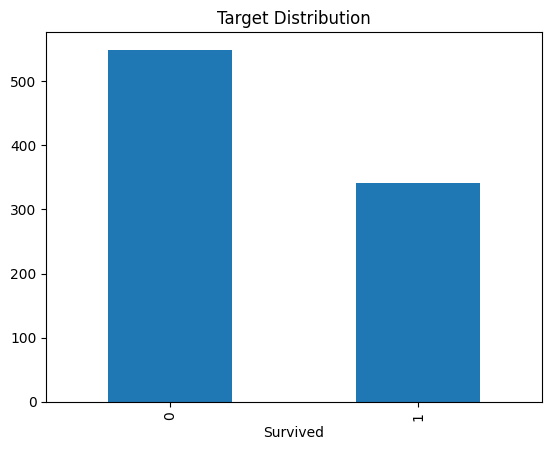

In [3]:
TARGET = "Survived"
print(df[TARGET].value_counts(normalize=True))
df[TARGET].value_counts().plot(kind='bar', title='Target Distribution')
plt.show()

### Checking Distrubution of Numeric Fields

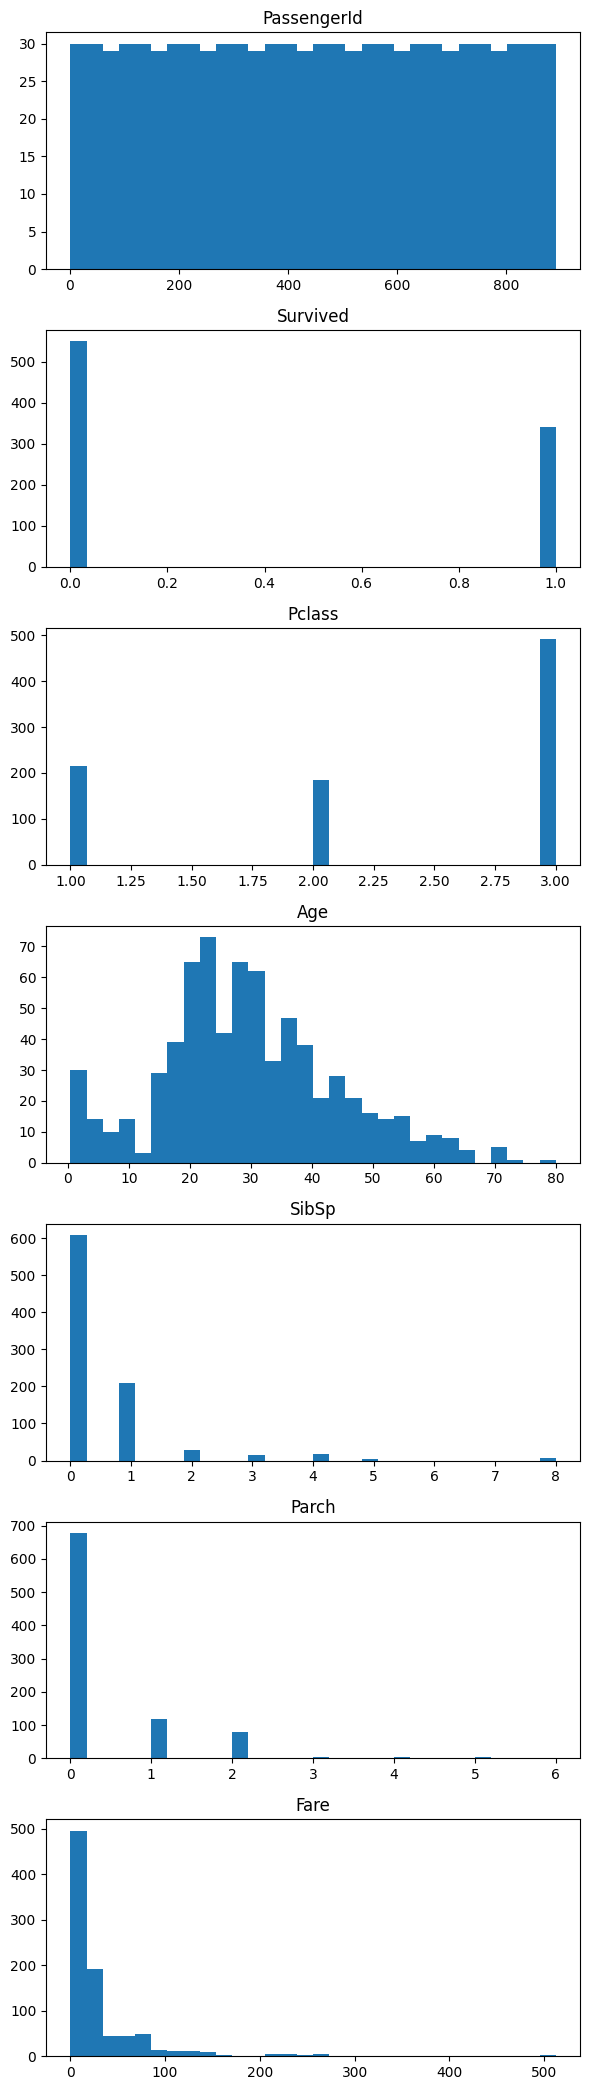

In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(len(num_cols), 1, figsize=(6, 3*len(num_cols)))
for ax, col in zip(axes, num_cols):
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(col)
plt.tight_layout()
plt.show()


### Check Categorical Cardinality

In [8]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    print(f"{c} - unique: {df[c].nunique()}")
    print(df[c].value_counts().head(), "\n")


Name - unique: 891
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Name: count, dtype: int64 

Sex - unique: 2
Sex
male      577
female    314
Name: count, dtype: int64 

Ticket - unique: 681
Ticket
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
Name: count, dtype: int64 

Cabin - unique: 147
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
Name: count, dtype: int64 

Embarked - unique: 3
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 



### Numeric Correlation Heatmap

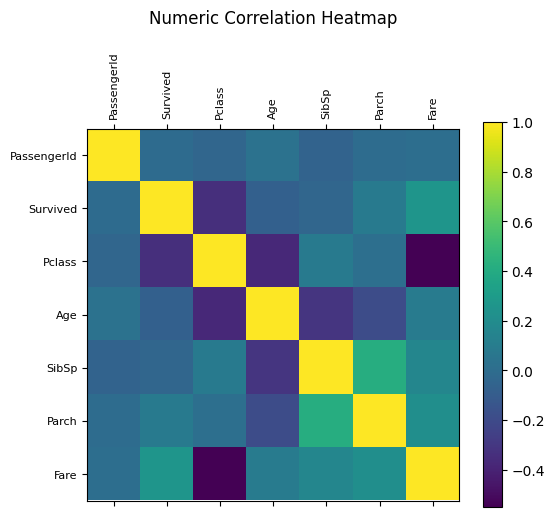

In [9]:
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(6,5))
cax = ax.matshow(corr.values)
fig.colorbar(cax)
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=90, fontsize=8)
ax.set_yticklabels(num_cols, fontsize=8)
plt.title("Numeric Correlation Heatmap", pad=20)
plt.show()


## Note
When you run the above, note:

* Missingness in Age, Cabin, and Embarked.
* Sex and Pclass have obvious survival correlation.
* Fare is skewed; may need log-transform in modeling.
* Cabin has high cardinality → likely not useful directly.